In [112]:
# hide the warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1) Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with 𝑘∈{2,3,4,5} (random=0 and remaining parameters as default). Assess the silhouette and purity of the produced solutions.

In [113]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score

# Read ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']
X_scaled = MinMaxScaler().fit_transform(X)

k_values = [2, 3, 4, 5]

for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    if (k==3):
        kmeans3 = kmeans

    # Calculate silhouette scores and purity scores
    s_score = silhouette_score(X_scaled, kmeans.labels_)
    confusion_matrix = contingency_matrix(y, kmeans.labels_)
    p_score = np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)
    
    print('For K =', k)
    print('Silhouete score:', s_score)
    print('Purity score:', p_score, '\n')

For K = 2
Silhouete score: 0.36044124340441114
Purity score: 0.632258064516129 

For K = 3
Silhouete score: 0.29579055730002257
Purity score: 0.667741935483871 

For K = 4
Silhouete score: 0.27442402122340176
Purity score: 0.6612903225806451 

For K = 5
Silhouete score: 0.23823928397844843
Purity score: 0.6774193548387096 



## 2) Consider the application of PCA after the data normalization:

### i. Identify the variability explained by the top two principal components.

In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit(X_scaled)

# Compute the explained variance for the top two components
explained_variance = pca.explained_variance_ratio_
print('Explained variance of the top two components:', explained_variance)

Explained variance of the top two components: [0.56181445 0.20955953]


### ii. For each one of these two components, sort the input variables by relevance by inspecting the absolute weights of the linear projection.

In [115]:
# Get the absolute weights
component_weights = abs(pca.components_)

# Sort the input variables by relevance
relevance_df = pd.DataFrame(component_weights, columns=X.columns, index=['Component 1', 'Component 2']).T
relevance_df = relevance_df.sort_values(by=['Component 1', 'Component 2'], ascending=False)

print('Sorted relevance of input variables in the top two components:')
print(relevance_df)

Sorted relevance of input variables in the top two components:
                          Component 1  Component 2
pelvic_incidence             0.591621     0.100037
lumbar_lordosis_angle        0.515085     0.080047
pelvic_tilt                  0.467039     0.670373
sacral_slope                 0.325689     0.443303
degree_spondylolisthesis     0.216930     0.004583
pelvic_radius                0.115824     0.581074


## 3) Visualize side-by-side the data using: i) the ground diagnoses, and ii) the previously learned 𝑘=3 clustering solution. To this end, projected the normalized data onto a 2-dimensional data space using PCA and then color observations using the reference and cluster annotations.

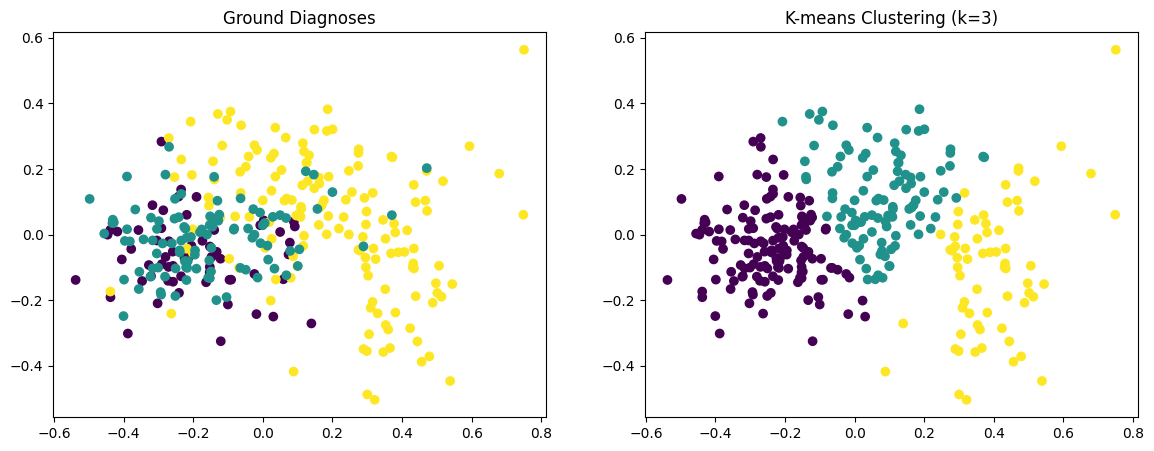

In [116]:
import matplotlib.pyplot as plt

# Reduce the dimensionality of data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Real labels as inetegers to compare with kmeans labels
codes = {'Hernia':0, 'Normal':1, 'Spondylolisthesis':2}
y_pred = y.map(codes).tolist()

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('Ground Diagnoses')

plt.subplot(122)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans3.labels_)
plt.title('K-means Clustering (k=3)')
plt.show()

## 4) Considering the results from questions (1) and (3), identify two ways on how clustering can be used to characterize the population of ill and healthy individuals.

To comment ...